Example with all algorithms using the dataset iris

# Dataset and imports

In [2]:
# data-handling
import pandas as pd
import numpy as np
#som
from minisom import MiniSom
# data
from datasets.artificial_data import normalized_data, labels, normalize
# plotagem
import matplotlib.pyplot as plt
#costa_netto
from costa_netto.costa_netto_alg import consistent_matrix, label_data
# silva_costa
from silva_costa.silva_costa_alg import silva_costa, compute_DBI
# silva
from silva.silva_alg import cluster

In [3]:
iris_data = normalized_data['iris']
iris_labels = labels['iris']

# costa-netto

In [ ]:
som_cn = MiniSom(1, 30, iris_data.shape[1], random_seed=42, topology='hexagonal')
som_cn.train(iris_data, num_iteration=10*iris_data.shape[0])

In [5]:
matrix = consistent_matrix(iris_data, som_cn, 1, 30, 1.5, 0.3, 1.5)

In [6]:
label_cn, neuron_label_cn = label_data(som_cn, iris_data, matrix, 1, 30)

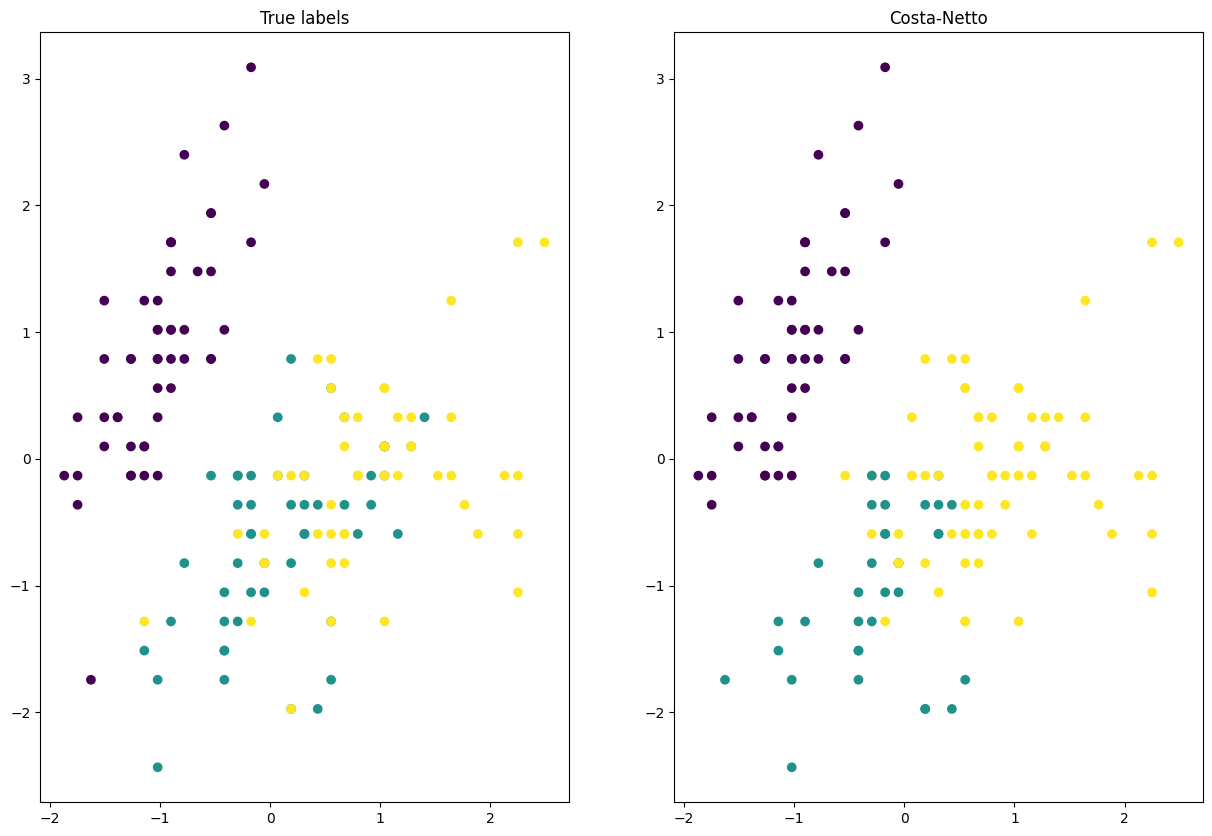

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].set_title("True labels")
axes[0].scatter(iris_data[:, 0], iris_data[:, 1], c=iris_labels)
axes[1].set_title("Costa-Netto")
axes[1].scatter(iris_data[:, 0], iris_data[:, 1], c=label_cn)
plt.show()

# silva-costa

In [7]:
som_sc = MiniSom(5, 6, iris_data.shape[1], random_seed=42, topology='rectangular', sigma=2.5)
som_sc.train(iris_data, num_iteration=10*iris_data.shape[0])

In [8]:
adj_array, heuristic_v = compute_DBI(som_sc, 5, 6, iris_data)
label_sc, neuron_label_sc = silva_costa(som_sc, 5, 6, iris_data, adj_array, heuristic_v.round(2), forceAllNeurons=True)

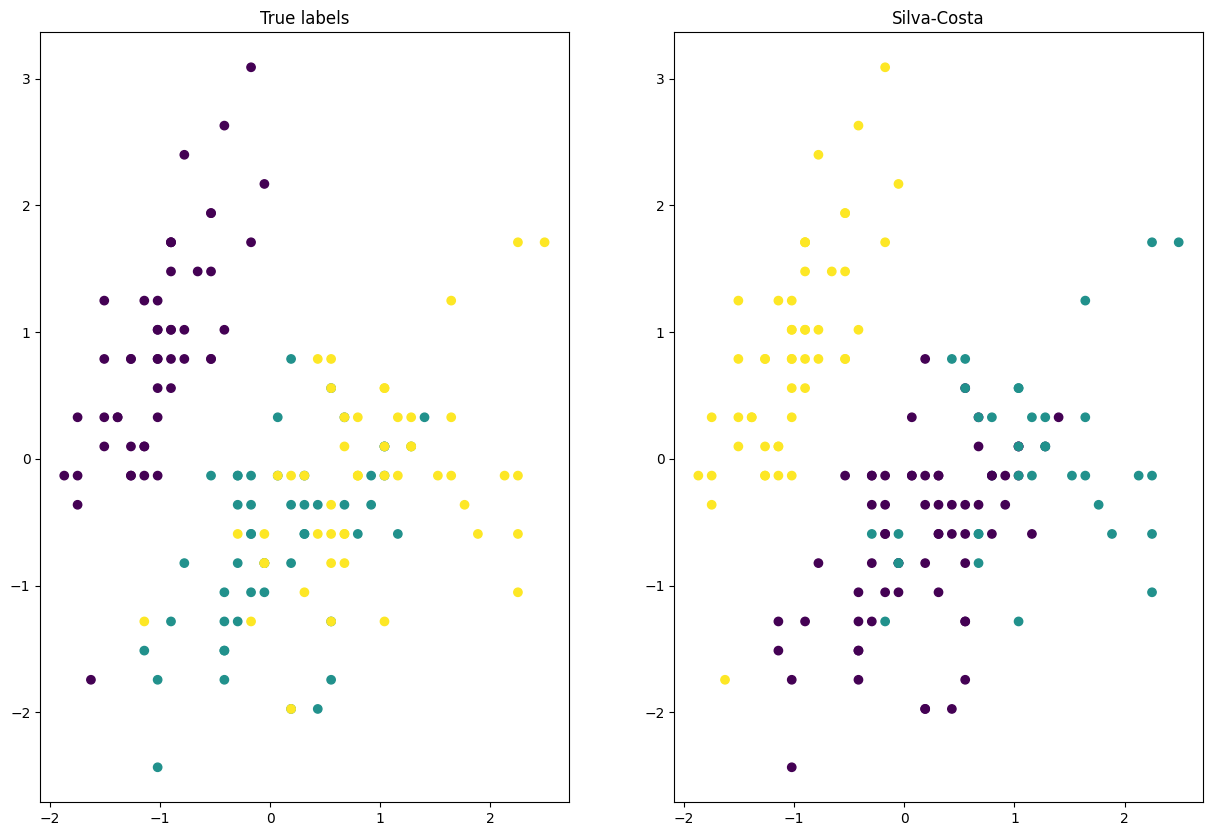

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].set_title("True labels")
axes[0].scatter(iris_data[:, 0], iris_data[:, 1], c=iris_labels)
axes[1].set_title("Silva-Costa")
axes[1].scatter(iris_data[:, 0], iris_data[:, 1], c=label_sc)
plt.show()

# silva

In [ ]:
som_silva = MiniSom(1, 30, iris_data.shape[1], random_seed=42, topology='hexagonal')
som_silva.train(iris_data, num_iteration=10*iris_data.shape[0])

In [10]:
neuron_clusters = cluster(som_silva, iris_data, k=3)
labels_silva = np.array([neuron_clusters[som_silva.winner(x)] for x in iris_data])

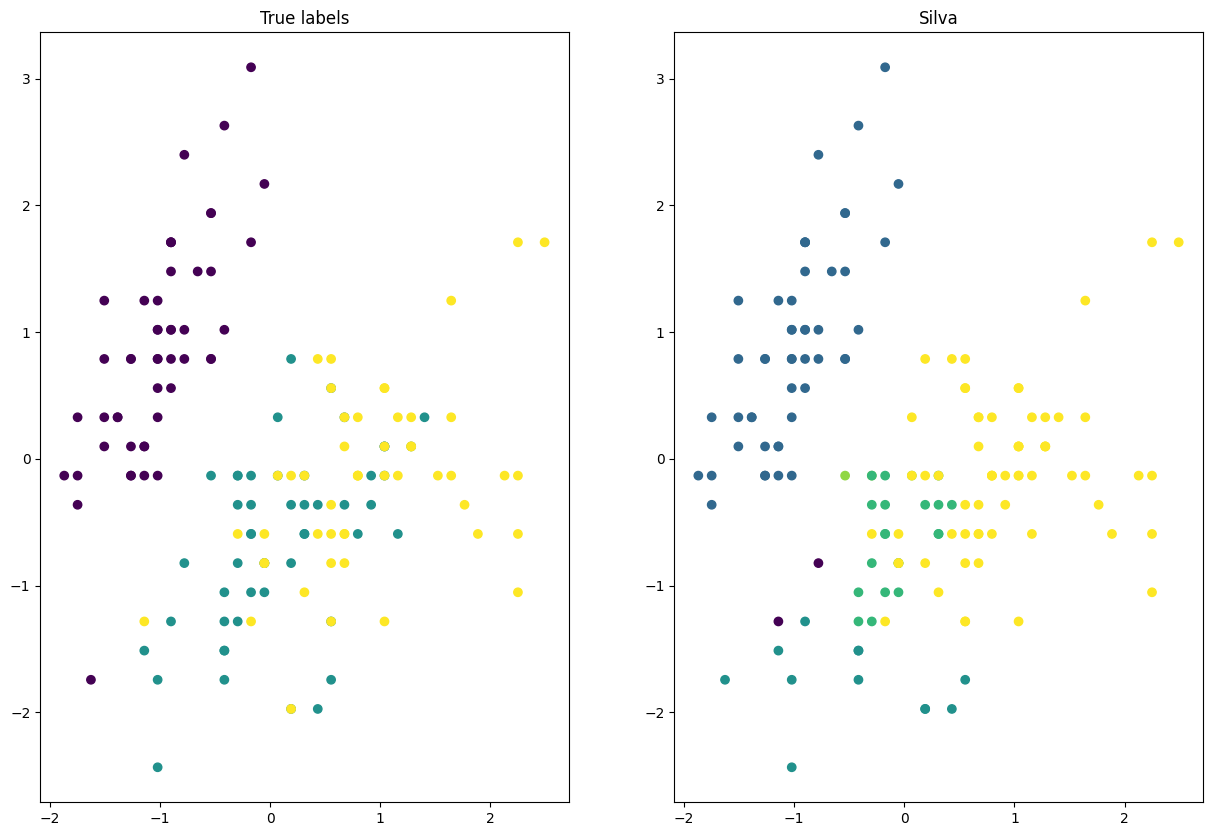

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].set_title("True labels")
axes[0].scatter(iris_data[:, 0], iris_data[:, 1], c=iris_labels)
axes[1].set_title("Silva")
axes[1].scatter(iris_data[:, 0], iris_data[:, 1], c=labels_silva)
plt.show()